# Карты кохонена

## Подключение библиотек

In [1]:
import pandas as pd
import numpy as np
import datatable as dt
from tqdm import tqdm
import matplotlib.pyplot as plt
from copy import deepcopy, copy

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from warnings import filterwarnings

np.random.seed(50)

## Загрузка данных

In [2]:
DT = dt.fread('data/glass3.dt')
DT

,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
,▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪,▪,▪,▪,▪,▪
0,bool_in=0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,real_in=9,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,bool_out=6,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,real_out=0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,training_examples=107,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,validation_examples=54,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,test_examples=53,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,0.226514,0.392481,0.7951,0.398754,0.574109,0.0982287,0.228625,0,0,0,1,0,0,0,0
8,0.283582,0.475188,0.801782,0.333333,0.547842,0.0772947,0.223048,0,0,1,0,0,0,0,0


## Подготовка данных

Удалим лишние строки

In [3]:
del DT[0:7,:]
DT

,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
,▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪,▪,▪,▪,▪,▪
0,0.226514,0.392481,0.7951,0.398754,0.574109,0.0982287,0.228625,0,0,0,1,0,0,0,0
1,0.283582,0.475188,0.801782,0.333333,0.547842,0.0772947,0.223048,0,0,1,0,0,0,0,0
2,0.243635,0.377444,0.7951,0.339564,0.542214,0.0901771,0.27974,0,0.196078,0,0,1,0,0,0
3,0.308604,0.449624,0,0.0841121,0.870544,0,0.516729,0,0,0,1,0,0,0,0
4,0.287094,0.439098,0.815145,0.255452,0.555347,0.0177134,0.29461,0,0,0,0,1,0,0,0
5,0.216857,0.643609,0,0.691589,0.60788,0.00805153,0.315985,0.168254,0,0,0,0,0,0,1
6,0.41396,0.318797,0.358575,0.58567,0.444653,0.122383,0.39684,0.0761905,1,0,0,0,1,0,0
7,0.0882353,0.344361,0,0.856698,0.125704,1,0.142193,0,0,0,0,0,1,0,0
8,0.385865,0.381955,0,0.457944,0.604128,0.0756844,0.547398,0,0,0,0,0,1,0,0


Представим таблицу с данными в виде DataFrame Pandas.

In [4]:
import pandas as pd
df = pd.DataFrame(DT.to_pandas())
df

,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
0,0.226514,0.392481,0.795100,0.398754,0.574109,0.098229,0.228625,0.000000,0.000000,False,True,False,False,False,False
1,0.283582,0.475188,0.801782,0.333333,0.547842,0.077295,0.223048,0.000000,0.000000,True,False,False,False,False,False
2,0.243635,0.377444,0.795100,0.339564,0.542214,0.090177,0.279740,0.000000,0.196078,False,False,True,False,False,False
3,0.308604,0.449624,0.000000,0.084112,0.870544,0.000000,0.516729,0.000000,0.000000,False,True,False,False,False,False
4,0.287094,0.439098,0.815145,0.255452,0.555347,0.017713,0.294610,0.000000,0.000000,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,0.291045,0.372932,0.625835,0.311526,0.594747,0.082126,0.333643,0.000000,0.176471,True,False,False,False,False,False
210,0.28007,0.276692,0.772829,0.339564,0.671670,0.096618,0.289963,0.000000,0.117647,True,False,False,False,False,False
211,0.882353,0.000000,0.000000,0.563863,0.000000,0.093398,0.731413,1.000000,0.549020,False,True,False,False,False,False
212,0.265145,0.604511,0.000000,0.532710,0.602251,0.000000,0.288104,0.504762,0.156863,False,False,False,False,False,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C0      214 non-null    object 
 1   C1      214 non-null    float64
 2   C2      214 non-null    float64
 3   C3      214 non-null    float64
 4   C4      214 non-null    float64
 5   C5      214 non-null    float64
 6   C6      214 non-null    float64
 7   C7      214 non-null    float64
 8   C8      214 non-null    float64
 9   C9      214 non-null    bool   
 10  C10     214 non-null    bool   
 11  C11     214 non-null    bool   
 12  C12     214 non-null    bool   
 13  C13     214 non-null    bool   
 14  C14     214 non-null    bool   
dtypes: bool(6), float64(8), object(1)
memory usage: 16.4+ KB


Преобразуем все столбцы в тип float.

In [6]:
df = df.astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C0      214 non-null    float64
 1   C1      214 non-null    float64
 2   C2      214 non-null    float64
 3   C3      214 non-null    float64
 4   C4      214 non-null    float64
 5   C5      214 non-null    float64
 6   C6      214 non-null    float64
 7   C7      214 non-null    float64
 8   C8      214 non-null    float64
 9   C9      214 non-null    float64
 10  C10     214 non-null    float64
 11  C11     214 non-null    float64
 12  C12     214 non-null    float64
 13  C13     214 non-null    float64
 14  C14     214 non-null    float64
dtypes: float64(15)
memory usage: 25.2 KB


Разделим данные на признаки и метки.

In [7]:
# X = df
X, y = df.iloc[:,0:9].to_numpy(), df.iloc[:,9:].to_numpy()

Стандартизация признаков.

In [8]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# scaler.fit(X)
# X = scaler.transform(X)

Разбивка датасета на тренировочную и тестовую выборки.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)

In [10]:
def get_coordinates(i, j):
    return i, j

## Модель для карт Кохонена

In [11]:
class KohonenMaps:
    def __init__(self, maps_shape: tuple, learning_time=1000, radius_0=None):
        self.map = np.random.rand(*maps_shape)
        self.learning_time = learning_time
        if radius_0 is None:
            self.radius = min(maps_shape) // 2
        else:
            self.radius = radius_0
#         self.speed_parameter_1 = self.learning_time / self.radius
        self.speed_parameter_1 = self.get_speed_parameter()
    
    def save_weights(self, save_path):
        """Сохраняет веса модели"""
        with open(save_path, 'wb') as f:
            np.save(f, np.array(self.map))
            
    def load_weights(self, load_path):
        """Загружает веса модели"""
        with open(load_path, 'rb') as f:
            self.map = np.load(f)
        
    def activation_function(self, input_vector):
        map_result = np.apply_along_axis(np.linalg.norm, 2, self.map - input_vector)
        activation_result = np.exp(-map_result)
        return activation_result
    
    def get_winner_neuron(self, input_vector):
        activation_result = self.activation_function(input_vector)
        
        winer_x, winer_y = np.where(activation_result==activation_result.max())
        
        return np.array([int(winer_x), int(winer_y)])  
            
    # Можно посчитать при инициализации
    def get_speed_parameter(self):
        return self.learning_time / self.radius
        
    def get_effective_width(self, current_time=1):
        """
        Рассчитывает эффективную ширину,
        определяющую размер окрестности вокруг нейрона победителя,
        в которой производится коррекция весов
        """
        effective_radius = self.radius * np.exp(-current_time/self.speed_parameter_1)
        return effective_radius
    
    def get_neuron_distance(self, neuron_coord, winer_neuron_coord):
        """Рассчитывает расстояние между нейронами"""
        neuron_distance = np.linalg.norm(neuron_coord - winer_neuron_coord)
        return neuron_distance
    
    def h_distance_func(self, neuron_coord, winer_neuron_coord, current_time):
        """Функция затухиня от расстояния от j-го нейрона до победителя"""
        effective_width = self.get_effective_width(current_time)
        neuron_distance = self.get_neuron_distance(neuron_coord, winer_neuron_coord)
        return np.exp(-neuron_distance**2/2/effective_width**2)

## Ошибка представления карты Кохонена

In [12]:
def get_single_input_error(kohonen_map_model, input_vector):
    winer_neuron = kohonen_map_model.get_winner_neuron(input_vector)

    winer_neuron_i, winer_neuron_j = get_coordinates(*winer_neuron)

    single_input_error = np.linalg.norm(
                                        kohonen_map_model.map[winer_neuron_i,
                                                                    winer_neuron_j]
                                        - input_vector
                                        )
    
    return single_input_error


def get_kohonen_map_error(kohonen_map_model, data):
    error = 0
    for input_vector in data:
        error += get_single_input_error(kohonen_map_model, input_vector)
        
    return error


# get_single_input_error(kohonen_maps_consistent, input_a)

# get_kohonen_map_error(kohonen_maps_consistent, X_test)

## Некоторые вспомогательные функции

In [13]:
def create_history_map(map_i, map_j):
    """Создаёт пустой массив формы карты"""
    row = [[] for item in range(map_j)]
    history_map = [deepcopy(row) for columnt in range(map_i)]
    return history_map

def get_win_map(kohonen_map_model, data):
    """История выигрышей"""
    win_history_map = create_history_map(kohonen_map_model.map.shape[0], 
                           kohonen_map_model.map.shape[1])
    for input_vector in data:
        winer_neuron_coord = kohonen_map_model.get_winner_neuron(input_vector)
        win_history_map[winer_neuron_coord[0]][winer_neuron_coord[1]].append(input_vector)
        
    return win_history_map

def get_score_board(win_history_map):
    """Создаёт карту выигрышей (количество побед у каждого нейрона)"""
    score_board_shape = len(win_history_map[0]), len(win_history_map[1])
    score_board = np.zeros(score_board_shape, dtype=np.int64)
    for i, row in enumerate(win_history_map):
        for j, item in enumerate(row):
            score_board[i, j] = len(item)
    return score_board

def mark_dead_neurons(score_board, kohonen_map_model, treshold=2, mark_as=np.inf):
    for i_score, score_row in enumerate(score_board):
        for j_score, score_item in enumerate(score_row):
            if score_item <= treshold:
                kohonen_map_model.map[i_score][j_score] = mark_as 

## Класс для последовательного обучения

In [14]:
class KohonenMapsConsistentAlg(KohonenMaps):
    def __init__(self, maps_shape, 
                 radius_0=None, 
                 learning_time=1000, 
                 speed_parameter_2=1000):
        super().__init__(maps_shape, learning_time, radius_0)
        self.speed_parameter_2 = speed_parameter_2
    
    def get_learning_rate(self, current_time, learning_rate_start=0.1):
        """Рассчитывает скорость обучения для t-го времени обучения"""
        learning_rate = learning_rate_start * np.exp(-current_time/self.speed_parameter_2)
        return learning_rate
        
    def update_neuron_weight(self, input_vector, neuron_coord, winer_neuron_coord, current_time):
        """Обновляет веса отдельного нейрона"""
        i_neuron, j_neuron = get_coordinates(*neuron_coord)
        i_winer_neuron, j_winer_neuron = get_coordinates(*winer_neuron_coord)
        
        learning_rate = self.get_learning_rate(current_time)
        h_distance = self.h_distance_func(neuron_coord, winer_neuron_coord, current_time)
        
        residual = (input_vector - self.map[i_winer_neuron, j_winer_neuron])
        
        self.map[i_neuron, j_neuron] = self.map[i_neuron, j_neuron] + learning_rate * h_distance * residual
            
    def update_all_weights(self, input_vector, winer_neuron_coord, current_time):
        """Обновляет веса всех нейронов"""
        for i, row in enumerate(self.map):
            for j, neuron in enumerate(row):
                neuron_coord = [i, j]
                self.update_neuron_weight(input_vector, neuron_coord, winer_neuron_coord, current_time)

In [15]:
def create_history_map(map_i, map_j):
    row = [[] for item in range(map_j)]
    history_map = [deepcopy(row) for columnt in range(map_i)]
    return history_map

def get_win_map(kohonen_map_model, data):
    win_history_map = create_history_map(kohonen_map_model.map.shape[0], 
                           kohonen_map_model.map.shape[1])
    for input_vector in data:
        winer_neuron_coord = kohonen_map_model.get_winner_neuron(input_vector)
        win_history_map[winer_neuron_coord[0]][winer_neuron_coord[1]].append(input_vector)
        
    return win_history_map

def get_score_board(win_history_map):
    score_board_shape = len(win_history_map[0]), len(win_history_map[1])
    score_board = np.zeros(score_board_shape, dtype=np.int64)
    for i, row in enumerate(win_history_map):
        for j, item in enumerate(row):
            score_board[i, j] = len(item)
    return score_board

## Алгоритм последовательного обучения

In [16]:
def train(kohonen_map_model, train_data, test_data=None, 
          learning_time=1000, converge_interval=10):
    test_history = []
    for epoch in tqdm(range(learning_time)):
        for input_vector in train_data:
            winer_neuron_coord = kohonen_map_model.get_winner_neuron(input_vector)
            kohonen_map_model.update_all_weights(input_vector, winer_neuron_coord, epoch)
        
        if test_data is not None:
            epoch_error = get_kohonen_map_error(kohonen_map_model, test_data)
            test_history.append(epoch_error)
            
        if epoch >= converge_interval:
            if np.isclose(test_history[epoch-converge_interval:], 
                          test_history[-1]).all():
                break
    
    return test_history

In [17]:
# kohonen_maps_consistent = KohonenMapsConsistentAlg((4,4,9))
# kohonen_maps_consistent = KohonenMapsConsistentAlg((6,6,9))
kohonen_maps_consistent = KohonenMapsConsistentAlg((8, 8, 9))
# kohonen_maps_consistent = KohonenMapsConsistentAlg((9, 9, 9))
# kohonen_maps_consistent = KohonenMapsConsistentAlg((20,20,9))
            
valid_history = train(kohonen_maps_consistent, 
                      X_train,
                      X_test,
                      learning_time=1000,
                      converge_interval=20)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [26:16<00:00,  1.58s/it]


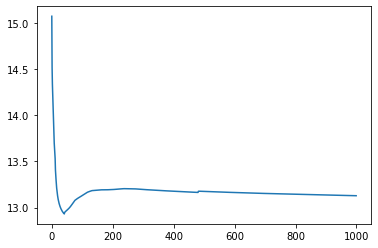

In [18]:
plt.plot(valid_history)

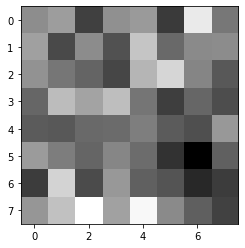

In [19]:
map_deisity_consistent_alg = np.apply_along_axis(np.sum, 2, kohonen_maps_consistent.map)

plt.imshow(map_deisity_consistent_alg, cmap='gray')

## Класс для пакетного обучения

In [20]:
class KohonenMapsPackageAlg(KohonenMaps):
    def __init__(self,maps_shape, 
                 radius_0=None, 
                 learning_time=1000):
        super().__init__(maps_shape, learning_time, radius_0)
    
    def get_neighbour_neurons_area(self, neuron_coords, current_time):
        effective_width = self.get_effective_width(current_time)
        i_neur, j_neur = get_coordinates(*neuron_coords)
        i_area_start, i_area_end = int(i_neur - effective_width), int(i_neur + effective_width)
#         map_max_i_index = self.map.shape[0] - 1
        map_max_i_index = self.map.shape[0]
        i_area_start, i_area_end = np.clip(i_area_start, 0, map_max_i_index), np.clip(i_area_end, 0, map_max_i_index)
        
        j_area_start, j_area_end = int(j_neur - effective_width), int(j_neur + effective_width)
#         map_max_j_index = self.map.shape[1] - 1
        map_max_j_index = self.map.shape[1]
        j_area_start, j_area_end = np.clip(j_area_start, 0, map_max_j_index), np.clip(j_area_end, 0, map_max_j_index)
        
        return range(i_area_start, i_area_end), range(j_area_start, j_area_end)
        
    def update_all_weights(self, history_map, current_time):
        """Обновляет веса всех нейронов"""
        for i, row in enumerate(self.map):
            for j, neuron in enumerate(row):
                neuron_coords = np.array([i, j])
                i_area_indices, j_area_indices = self.get_neighbour_neurons_area(neuron_coords, current_time)
#                 h_distance_wins = 0
                h_distance_wins = 0.001
                for i_area_index in i_area_indices:
                    for j_area_index in j_area_indices:
                        area_neuron_cords = np.array([i_area_index, j_area_index])
                        h_distance = self.h_distance_func(area_neuron_cords, neuron_coords, current_time)
                        neuron_wins = len(history_map[i_area_index][j_area_index])
                        h_distance_wins += neuron_wins * h_distance
                
                mean_input_vector = np.mean(history_map[i][j], axis=0)
                if np.isnan(mean_input_vector).any():
                    mean_input_vector = 0
                
                self.map[i][j] = h_distance_wins * mean_input_vector / h_distance_wins                                    

In [21]:
def train_package(kohonen_map_model, train_data, test_data=None, 
                  learning_time=1000, converge_interval=10):
    test_history = []
    for epoch in tqdm(range(learning_time)):
        win_history_map = get_win_map(kohonen_map_model, train_data)
        
        kohonen_map_model.update_all_weights(win_history_map, epoch)
        
        if test_data is not None:
            
            epoch_error = get_kohonen_map_error(kohonen_map_model, test_data)
            test_history.append(epoch_error)
            
        if epoch >= converge_interval:
            if np.isclose(test_history[epoch-converge_interval:], 
                          test_history[-1]).all():
                break
    
    return test_history


# kohonen_map_package_alg = KohonenMapsPackageAlg((2, 2, 9))
# kohonen_map_package_alg = KohonenMapsPackageAlg((4, 4, 9))
# kohonen_map_package_alg = KohonenMapsPackageAlg((6, 6, 9))
kohonen_map_package_alg = KohonenMapsPackageAlg((8, 8, 9))
valid_history = train_package(kohonen_map_package_alg, 
                                X_train,
                                X_test,
                              learning_time=1000,
                              converge_interval=20)

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]C:\Users\markh\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\markh\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
  3%|██▏                                                                             | 27/1000 [00:16<10:04,  1.61it/s]


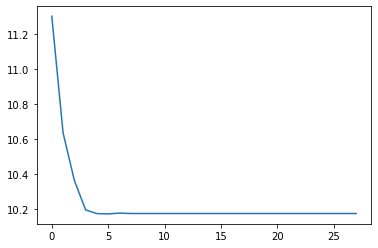

In [22]:
plt.plot(valid_history)

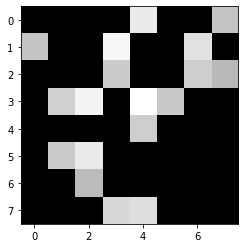

In [23]:
map_deisity_package_alg = np.apply_along_axis(np.sum, 2, kohonen_map_package_alg.map)

plt.imshow(map_deisity_package_alg, cmap='gray')

In [24]:
test_win_map = get_win_map(kohonen_map_package_alg, X_test)
get_score_board(test_win_map)

array([[ 0,  0,  0,  0,  1,  0,  0,  0],
       [ 2,  0,  0,  1,  0,  0,  2,  0],
       [ 0,  0,  0, 11,  0,  0,  4,  4],
       [ 0,  1,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  4,  0,  0,  0],
       [ 0,  4,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  5,  0,  0,  0]], dtype=int64)

In [25]:
test_win_map = get_win_map(kohonen_map_package_alg, X_train)
score_board = get_score_board(test_win_map)
score_board

array([[ 0,  0,  0,  0,  2,  0,  0,  2],
       [14,  0,  0,  6,  0,  0,  5,  0],
       [ 0,  0,  0, 55,  0,  0,  4,  8],
       [ 0,  2,  2,  0,  2,  4,  0,  0],
       [ 0,  0,  0,  0, 17,  0,  0,  0],
       [ 0,  8, 15,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  7, 17,  0,  0,  0]], dtype=int64)

## Исследование сходимости алгоритмов

In [26]:
LAUNCHES = 10

### Сходимость последовательного алгоритма

Для анализа сходимости используем обучение карт Кохонена по последовательному алгоритму используем следущие модели:

In [29]:
consistent_maps = {
    'consistent_map_2x2':(2,2,9),
    'consistent_map_4x4':(4,4,9),
    'consistent_map_6x6':(6,6,9),
    'consistent_map_8x8':(8,8,9)
}

best_convergence_history_consistent = {}

In [30]:
consistent_convergence_epochs = {
    'consistent_map_2x2': [], 
    'consistent_map_4x4': [],
    'consistent_map_6x6': [], 
    'consistent_map_8x8': []
}


model_dir = 'models'

least_error = np.inf

for map_name, map_shape in consistent_maps.items():
    print(map_name)
    for launch in range(LAUNCHES):
        kohonen_map_model = KohonenMapsConsistentAlg(map_shape)
        train_history = train(kohonen_map_model, X_train, X_test, 
              learning_time=1000, converge_interval=20)
        consistent_convergence_epochs[map_name].append(len(train_history))
        test_error = get_kohonen_map_error(kohonen_map_model, X_test)
        
        if test_error < least_error:
            least_error = test_error
            # Сохраняем историю сходимости лучшего результата обучения
            best_convergence_history_consistent[map_name] = train_history
            # Сохраняем лучший результат на диск
            current_model_save_path = f'{model_dir}/{map_name}.npy'
            kohonen_map_model.save_weights(current_model_save_path)

  0%|                                                                                 | 1/1000 [00:00<02:19,  7.14it/s]

consistent_map_2x2


  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]

consistent_map_4x4


  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]

consistent_map_6x6


  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]

consistent_map_8x8


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [18:15<00:00,  1.10s/it]


In [31]:
consistent_launch_analytics = pd.DataFrame(consistent_convergence_epochs)
consistent_launch_analytics.describe()

,consistent_map_2x2,consistent_map_4x4,consistent_map_6x6,consistent_map_8x8
count,10.0,10.000000,10.000000,10.000000
mean,1000.0,915.600000,878.600000,994.900000
std,0.0,226.118553,258.052191,16.127616
min,1000.0,282.000000,323.000000,949.000000
25%,1000.0,1000.000000,1000.000000,1000.000000
50%,1000.0,1000.000000,1000.000000,1000.000000
75%,1000.0,1000.000000,1000.000000,1000.000000
max,1000.0,1000.000000,1000.000000,1000.000000


Графики сходимости для последовательного алгоритма.

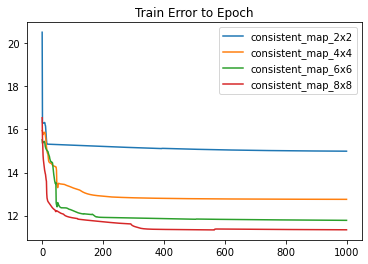

In [32]:
legend_list = []

for model_name, convergence_history in best_convergence_history_consistent.items():
    plt.plot(convergence_history)
    legend_list.append(model_name)
plt.legend(legend_list)
plt.title("Train Error to Epoch")
plt.show()

### Сходимость пакетного алгоритма

Для анализа сходимости используем обучение карт Кохонена по пакетному алгоритму используем следущие модели:

In [33]:
package_maps = {
    'package_map_2x2':(2,2,9),
    'package_map_4x4':(4,4,9),
    'package_map_6x6':(6,6,9),
    'package_map_8x8':(8,8,9)
}

best_convergence_history_package = {}

In [34]:
package_convergence_epochs = {'package_map_2x2': [], 'package_map_4x4': [],
                        'package_map_6x6': [], 'package_map_8x8': []}

model_dir = 'models'

least_error = np.inf

for map_name, map_shape in package_maps.items():
    print(map_name)
    for launch in range(LAUNCHES):
        kohonen_map_model = KohonenMapsPackageAlg(map_shape)
        train_history = train_package(kohonen_map_model, X_train, X_test, 
              learning_time=1000, converge_interval=20)
        package_convergence_epochs[map_name].append(len(train_history))
        test_error = get_kohonen_map_error(kohonen_map_model, X_test)
        
        if test_error < least_error:
            least_error = test_error
            # Сохраняем историю сходимости лучшего результата обучения
            best_convergence_history_package[map_name] = train_history
            # Сохраняем лучший результат на диск
            current_model_save_path = f'{model_dir}/{map_name}.npy'
            kohonen_map_model.save_weights(current_model_save_path)

  0%|▏                                                                                | 2/1000 [00:00<00:55, 18.02it/s]

package_map_2x2


  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]C:\Users\markh\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\markh\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
  0%|                                                                                 | 1/1000 [00:00<02:57,  5.63it/s]

package_map_4x4


  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]

package_map_6x6


  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]

package_map_8x8


  2%|██                                                                              | 25/1000 [00:11<07:25,  2.19it/s]


In [35]:
package_launch_analytics = pd.DataFrame(package_convergence_epochs)
package_launch_analytics.describe()

,package_map_2x2,package_map_4x4,package_map_6x6,package_map_8x8
count,10.000000,10.000000,10.000000,10.000000
mean,24.800000,26.100000,26.700000,27.500000
std,1.316561,2.378141,2.668749,2.877113
min,23.000000,23.000000,24.000000,24.000000
25%,24.000000,25.000000,25.250000,25.250000
50%,24.500000,25.000000,26.000000,26.500000
75%,25.000000,28.250000,27.000000,30.250000
max,27.000000,30.000000,33.000000,32.000000


Графики сходимости для пакетного алгоритма.

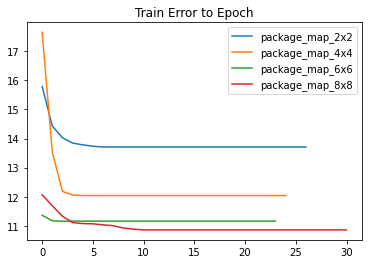

In [36]:
legend_list = []

for model_name, convergence_history in best_convergence_history_package.items():
    plt.plot(convergence_history)
    legend_list.append(model_name)
plt.legend(legend_list)
plt.title("Train Error to Epoch")
plt.show()

## Выделение мёртвых узлов

In [37]:
def get_max_value_coords(array_2d: np.ndarray):
    winer_x, winer_y = np.where(array_2d==array_2d.max())
    return int(winer_x), int(winer_y)

def substitute_map_max_value(score_board, winer_x, winer_y, substitute_with=0):
    score_board[winer_x, winer_y] = substitute_with
    
def get_top_neurons(score_board, top_num):
    score_board_copy = deepcopy(score_board)
    top_neurons = []

    for count in range(top_num):
        winer_x, winer_y = get_max_value_coords(score_board_copy)
        top_neurons.append((winer_x, winer_y))
        substitute_map_max_value(score_board_copy, winer_x, winer_y)

    return top_neurons
    

### Выделение мёртвых узлов. Последовательный алгоритм

Загрузим лучший результат с диска.

In [38]:
best_consistent_alg_model_path = 'models/consistent_map_8x8.npy'

best_consistent_alg_model = KohonenMapsConsistentAlg((8,8,9))

best_consistent_alg_model.load_weights(best_consistent_alg_model_path)

Присвоим всем значениям векторов "мёртвых" нейронов np.inf.

In [39]:
test_win_map = get_win_map(best_consistent_alg_model, X_train)
score_board = get_score_board(test_win_map)
                
mark_dead_neurons(score_board, best_consistent_alg_model)

best_consistent_alg_model.map

array([[[            inf,             inf,             inf,
                     inf,             inf,             inf,
                     inf,             inf,             inf],
        [            inf,             inf,             inf,
                     inf,             inf,             inf,
                     inf,             inf,             inf],
        [ 3.94430002e-01,  4.94072790e-01,  5.16857067e-02,
          3.30314215e-01,  5.92676107e-01,  3.26398396e-02,
          5.20293198e-01, -1.48916439e-68,  2.22851210e-02],
        [            inf,             inf,             inf,
                     inf,             inf,             inf,
                     inf,             inf,             inf],
        [            inf,             inf,             inf,
                     inf,             inf,             inf,
                     inf,             inf,             inf],
        [            inf,             inf,             inf,
                     inf,          

### Выделение мёртвых узлов. Пакетный алгоритм

Загрузим лучший результат с диска.

In [40]:
best_package_alg_model_path = 'models/package_map_8x8.npy'

best_package_alg_model = KohonenMapsPackageAlg((8,8,9))

best_package_alg_model.load_weights(best_package_alg_model_path)

Присвоим всем значениям векторов "мёртвых" нейронов np.inf.

In [41]:
test_win_map = get_win_map(best_package_alg_model, X_train)
score_board = get_score_board(test_win_map)
                
mark_dead_neurons(score_board, best_package_alg_model)

best_package_alg_model.map

array([[[           inf,            inf,            inf,            inf,
                    inf,            inf,            inf,            inf,
                    inf],
        [           inf,            inf,            inf,            inf,
                    inf,            inf,            inf,            inf,
                    inf],
        [           inf,            inf,            inf,            inf,
                    inf,            inf,            inf,            inf,
                    inf],
        [           inf,            inf,            inf,            inf,
                    inf,            inf,            inf,            inf,
                    inf],
        [           inf,            inf,            inf,            inf,
                    inf,            inf,            inf,            inf,
                    inf],
        [           inf,            inf,            inf,            inf,
                    inf,            inf,            inf,           

## Исследование наиболее успешных нейронов

In [110]:
def get_win_map_labels(kohonen_map_model, data, labels):
    win_history_map = create_history_map(kohonen_map_model.map.shape[0], 
                           kohonen_map_model.map.shape[1])
    for input_vector, label in zip(data, labels):
        winer_neuron_coord = kohonen_map_model.get_winner_neuron(input_vector)
        win_history_map[winer_neuron_coord[0]][winer_neuron_coord[1]].append(label)
        
    return win_history_map


def get_top_neurons_labels(win_map_labels, top_neurons):
    top_neurons_labels = []
    for neuron_num, top_neuron in enumerate(top_neurons, 1):
        i_top_neuron, j_top_neuron = top_neuron
        top_neurons_labels.append(np.argmax(np.array(win_map_labels[i_top_neuron][j_top_neuron]), axis=1))
        
    return top_neurons_labels


# def plot_top_neurons_labels(win_map_labels, top_neurons):
#     figure, axis = plt.subplots(len(top_neurons))

#     for neuron_num, top_neuron in enumerate(top_neurons, 1):
#         i_top_neuron, j_top_neuron = top_neuron
#         labels_distribution = np.argmax(np.array(win_map_labels[i_top_neuron][j_top_neuron]), axis=1)
#         axis[neuron_num-1].hist(labels_distribution)
#         axis[neuron_num-1].set_title(f'Neuron #{neuron_num}')
        
        
def plot_top_neurons_labels(top_neurons_labels):
    figure, axis = plt.subplots(len(top_neurons_labels))

    for neuron_num, neuron_labels in enumerate(top_neurons_labels):
        axis[neuron_num].hist(neuron_labels)
        axis[neuron_num].set_title(f'Neuron #{neuron_num+1}')
        

def get_labels_distribution(labels):
    distribution = np.bincount(labels)
    return distribution / np.sum(distribution)


def get_top_neurons_labels_stats(top_neurons_labels):
    for neuron_num, labels in enumerate(top_neurons_labels, 1):
        print(f'Neuron #{neuron_num}')
        distribution = get_labels_distribution(labels)
        for label_num, percentage in enumerate(distribution):
            print('label {label_num}: {percentage:.2f}%'.format(label_num=label_num, percentage=percentage*100))

### Исследование наиболее успешных нейронов карт, обученных согласно последовательному алгоритму

Выведем нейроны, которые чаще других оказывались победителями.

In [123]:
top_n = 3

# test_win_map = get_win_map(best_consistent_alg_model, X_test)
test_win_map = get_win_map(best_consistent_alg_model, X_train)
score_board = get_score_board(test_win_map)

top_neurons = get_top_neurons(score_board, top_n)

for num, top_neuron in enumerate(top_neurons):
    i_top_neuron, j_top_neuron = top_neuron
    print(f'Neuron #{num + 1}:\n', best_consistent_alg_model.map[i_top_neuron, j_top_neuron])

Neuron #1:
 [0.27802799 0.38912863 0.78788015 0.33356289 0.53381417 0.08547118
 0.27625502 0.00129352 0.03293365]
Neuron #2:
 [0.29600666 0.34526909 0.77436386 0.2878176  0.56021891 0.07939165
 0.30813337 0.00400891 0.42756121]
Neuron #3:
 [ 2.06321966e-01  5.75917878e-01 -7.33278346e-37  7.00155694e-01
  6.34872928e-01  6.07532361e-03  3.25660355e-01  2.14110886e-01
  1.12113368e-02]


Проанализируем распределение классов для каждого успешного нейрона.

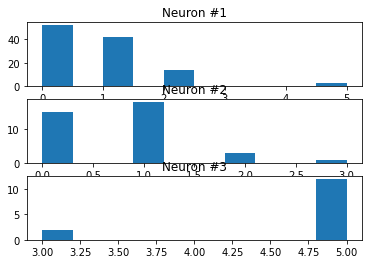

In [124]:
win_map_labels = get_win_map_labels(best_consistent_alg_model, X, y)

top_neurons_labels = get_top_neurons_labels(win_map_labels, top_neurons)

plot_top_neurons_labels(top_neurons_labels)

Для выбранных узлов определим, сколько соответствующих им векторов относятся к каждому классу.

In [125]:
get_top_neurons_labels_stats(top_neurons_labels)

Neuron #1
label 0: 46.85%
label 1: 37.84%
label 2: 12.61%
label 3: 0.00%
label 4: 0.00%
label 5: 2.70%
Neuron #2
label 0: 40.54%
label 1: 48.65%
label 2: 8.11%
label 3: 2.70%
Neuron #3
label 0: 0.00%
label 1: 0.00%
label 2: 0.00%
label 3: 14.29%
label 4: 0.00%
label 5: 85.71%


### Исследование наиболее успешных нейронов карт, обученных согласно пакетному алгоритму

Выведем нейроны, которые чаще других оказывались победителями.

In [120]:
top_n = 3

test_win_map = get_win_map(best_package_alg_model, X_train)
# test_win_map = get_win_map(best_consistent_alg_model, X_train)
score_board = get_score_board(test_win_map)

top_neurons = get_top_neurons(score_board, top_n)

for num, top_neuron in enumerate(top_neurons):
    i_top_neuron, j_top_neuron = top_neuron
    print(f'Neuron #{num + 1}:\n', best_package_alg_model.map[i_top_neuron, j_top_neuron])

Neuron #1:
 [2.65390909e-01 3.61881985e-01 7.74515788e-01 3.41971136e-01
 5.68053879e-01 9.07871127e-02 2.74163561e-01 6.73400000e-04
 1.78253030e-03]
Neuron #2:
 [0.422827   0.493609   0.74855235 0.24454832 0.38133209 0.03574879
 0.36617085 0.00174603 0.        ]
Neuron #3:
 [0.28455756 0.38972433 0.76763178 0.34977506 0.53085256 0.08838786
 0.279998   0.00634921 0.24074067]


Проанализируем распределение классов для каждого успешного нейрона.

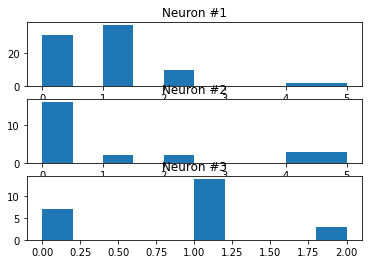

In [121]:
win_map_labels = get_win_map_labels(best_package_alg_model, X, y)

top_neurons_labels = get_top_neurons_labels(win_map_labels, top_neurons)

plot_top_neurons_labels(top_neurons_labels)

Для выбранных узлов определим, сколько соответствующих им векторов относятся к каждому классу.

In [122]:
get_top_neurons_labels_stats(top_neurons_labels)

Neuron #1
label 0: 37.80%
label 1: 45.12%
label 2: 12.20%
label 3: 0.00%
label 4: 2.44%
label 5: 2.44%
Neuron #2
label 0: 61.54%
label 1: 7.69%
label 2: 7.69%
label 3: 0.00%
label 4: 11.54%
label 5: 11.54%
Neuron #3
label 0: 29.17%
label 1: 58.33%
label 2: 12.50%
